In [211]:
# Імпорт бібліотек
import pandas
import numpy
import matplotlib
import statsmodels.api
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.metrics
from matplotlib import pyplot

In [212]:
dataFrame: pandas.DataFrame = pandas.read_csv("./winequality-red.csv", sep=",")

# Ось перші 15 рядків даних, для розуміння повної картини.
dataFrame.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [213]:
# Повна статистика по даних таблиці.
dataFrame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [214]:
# У нормалізації немає необхідності.
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [215]:
# Згідно мого варіанту, ось поля таблиці, на основі даних яких буде проводитись аналіз.
# Поле із вмістом алкоголю, можна виключити, так як на якість цей показник не впливає.

columns_names: list = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'pH',
    #'alcohol', 
]

columns_names

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH']

In [216]:
# Лінійна регресія.

In [217]:
# Значення полів, на основі яких буде проводитись навчання моделі (лінійної регресії).
X: numpy.ndarray = dataFrame[columns_names].values

# Перші 15 рядків.
X[:15]

array([[ 7.4  ,  0.7  ,  0.   ,  1.9  ,  3.51 ],
       [ 7.8  ,  0.88 ,  0.   ,  2.6  ,  3.2  ],
       [ 7.8  ,  0.76 ,  0.04 ,  2.3  ,  3.26 ],
       [11.2  ,  0.28 ,  0.56 ,  1.9  ,  3.16 ],
       [ 7.4  ,  0.7  ,  0.   ,  1.9  ,  3.51 ],
       [ 7.4  ,  0.66 ,  0.   ,  1.8  ,  3.51 ],
       [ 7.9  ,  0.6  ,  0.06 ,  1.6  ,  3.3  ],
       [ 7.3  ,  0.65 ,  0.   ,  1.2  ,  3.39 ],
       [ 7.8  ,  0.58 ,  0.02 ,  2.   ,  3.36 ],
       [ 7.5  ,  0.5  ,  0.36 ,  6.1  ,  3.35 ],
       [ 6.7  ,  0.58 ,  0.08 ,  1.8  ,  3.28 ],
       [ 7.5  ,  0.5  ,  0.36 ,  6.1  ,  3.35 ],
       [ 5.6  ,  0.615,  0.   ,  1.6  ,  3.58 ],
       [ 7.8  ,  0.61 ,  0.29 ,  1.6  ,  3.26 ],
       [ 8.9  ,  0.62 ,  0.18 ,  3.8  ,  3.16 ]])

In [218]:
# Значення поля, на основі якого буде проводитись навчання моделі, і значення якого буде прогнозуватись моделю.
y: numpy.ndarray = dataFrame['quality'].values

# Перші 15 рядків.
y[:15]

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5])

In [219]:
# Розділення даних для тренування моделі та її тестування.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

# Навчання моделі прогнозування.
regresion_model_1: sklearn.linear_model.LinearRegression = sklearn.linear_model.LinearRegression()
regresion_model_1.fit(X_train, y_train)

# Отримання прогнозованих даних, на основі частини існуючих даних, для перевірки похибки на графіку.
y_predicted: numpy.ndarray = regresion_model_1.predict(X_test)

In [220]:
# Коефіцієнт детермінації R² (лінійної регресії):
r_square: float = regresion_model_1.score(X_train, y_train)

r_square

0.1743090066030546

In [221]:
# Середня квадратична помилка MSE (лінійної регресії):

mse: float = sklearn.metrics.mean_squared_error(y_test, y_predicted)

mse

0.5487875060917794

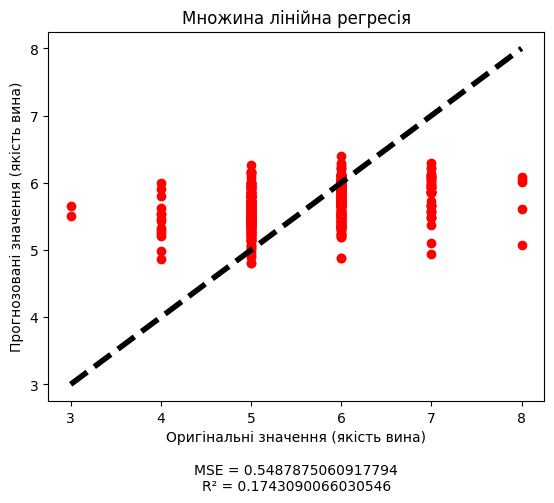

In [222]:
# Побудова графіку порівняння оригінальних та прогнозованих значень (лінійної регресії).
pyplot.scatter(y_test, y_predicted, color='r')
pyplot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
pyplot.title('Множина лінійна регресія')
pyplot.xlabel('Оригінальні значення (якість вина)\n\nMSE = {}\nR² = {}'.format(mse, r_square))
pyplot.ylabel('Прогнозовані значення (якість вина)')

pyplot.show()

In [223]:
# Поліноміальна регресія.

In [224]:
# Функція для створення поліноміальної регресійної моделі і на її основі,
# отримання прогнозаваних значень, коефіцієнта детермінації R², середньої квадратичної помилки MSE
# та побудови графіка порівняння оригінальних та прогнозованих значень.
def polynomial_regression_calculate(X_train, y_train, X_test, y_test, degree) -> None:
    polynomial_regression_model: sklearn.preprocessing.PolynomialFeatures = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    
    X: numpy.ndarray = polynomial_regression_model.fit_transform(X_train)

    polynomial_regression_model.fit(X, y_train)

    linear_regression_model: sklearn.linear_model.LinearRegression = sklearn.linear_model.LinearRegression()
    linear_regression_model.fit(X, y_train)
    
    y_predicted: numpy.ndarray = linear_regression_model.predict(X)
    
    r_square: float = linear_regression_model.score(X, y_train)
    mse: float = sklearn.metrics.mean_squared_error(y_train, y_predicted)
    
    # Побудова графіку порівняння оригінальних та прогнозованих значень
    pyplot.scatter(y_train, y_predicted, color='r')
    pyplot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    pyplot.title('Множина поліноміальна регресія\n(ступінь ознаки полінома degree = {})'.format(degree))
    pyplot.xlabel('Оригінальні значення (якість вина)\n\nMSE = {}\nR² = {}'.format(mse, r_square))
    pyplot.ylabel('Прогнозовані значення (якість вина)')

    pyplot.show()

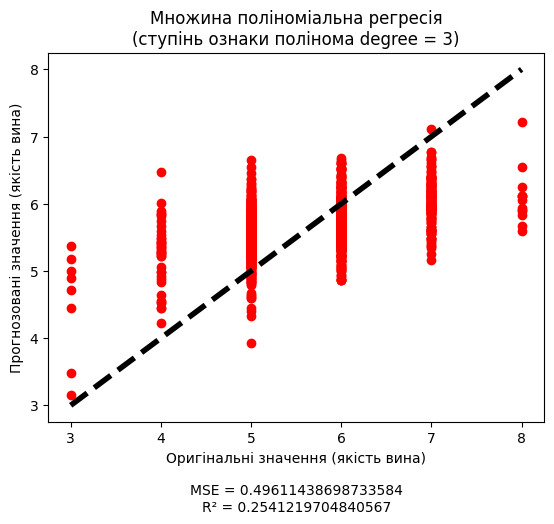

In [225]:
# Поліноміальна регресія (degree = 3)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 3)

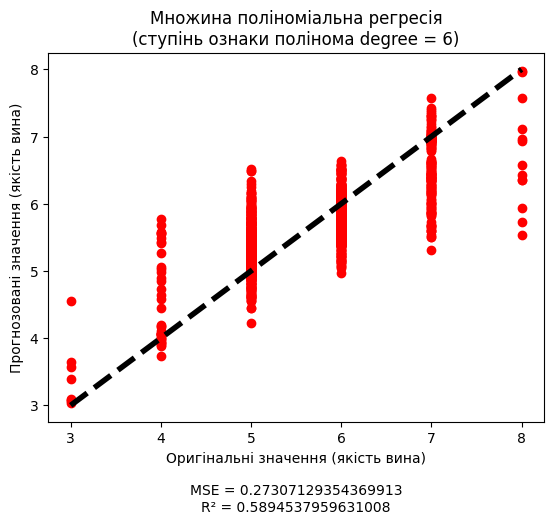

In [226]:
# Поліноміальна регресія (degree = 6)

polynomial_regression_calculate(X_train, y_train, X_test, y_test, 6)

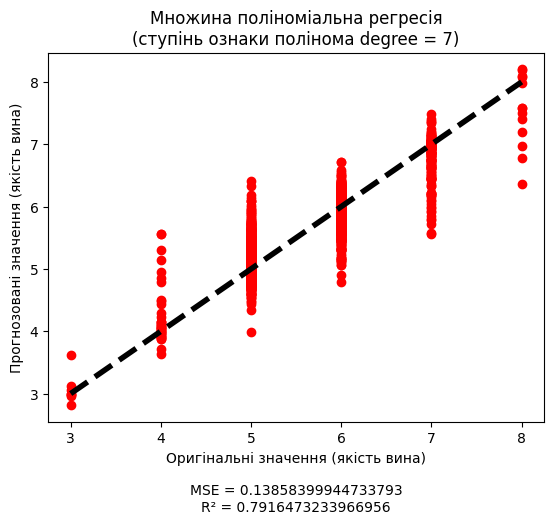

In [227]:
# Поліноміальна регресія (degree = 7)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 7)

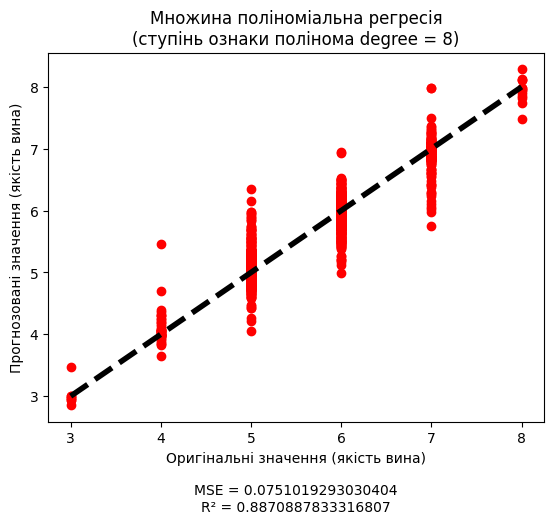

In [228]:
# Поліноміальна регресія (degree = 8)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 8)

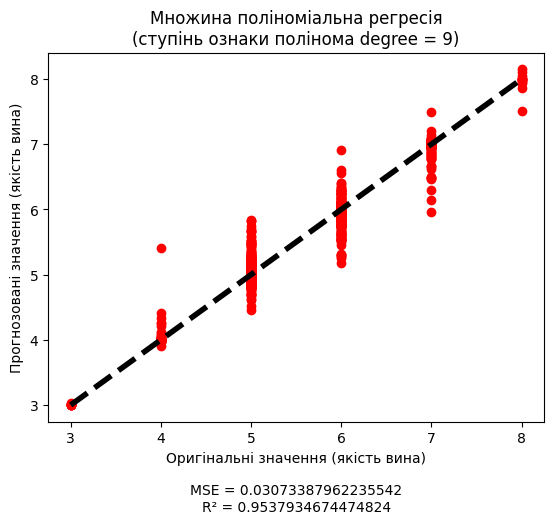

In [229]:
# Поліноміальна регресія (degree = 9)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 9)

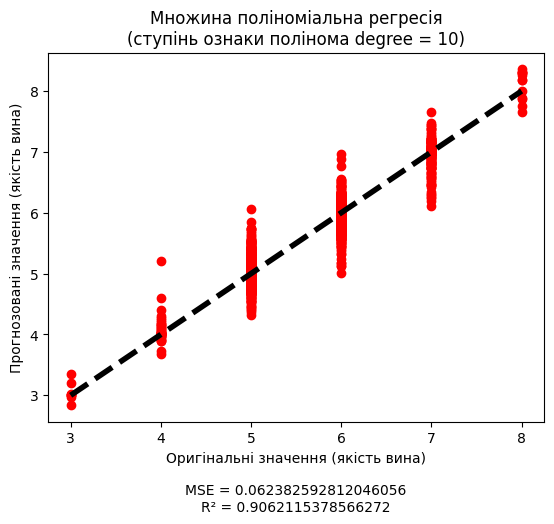

In [230]:
# Поліноміальна регресія (degree = 10)
polynomial_regression_calculate(X_train, y_train, X_test, y_test, 10)

In [231]:
# Висновок:
#
# Згідно проведеного аналізу даних, чітко видно з графіків,
# що у регресійних моделях із багатьма змінними (множинних регресійних моделях)
# (якість вина залежить від багатьох його характеристик),
# лінійна регресійна модель, показує значно гірший результат у плані прогнозування,
# на відміну від поліноміальних моделей. Коефіцієнт детермінації лінійної регресійної 
# моделі (на основі даних аналізу) R² ~ 0.17, що є не задовільним значенням,
# і не зможе використовуватись у реальних умовах.
#
# Щодо поліноміальних регресійних моделей, то із зміною ступеня ознаки полінома,
# при його значені 9, коефіцієнт детермінації (на основі даних аналізу) найвищий,
# і рівний R² ~ 0.95. При більшому і меншому значенні ступеня, значення коефіцієнту детермінації падає.
#
# Щодо значення середньої квадратичної помилки, то у поліноміальної регресійної моделі,
# із значенням ступеня ознаки полінома 9, значення середньої квадратичної помилки найнижче
# у порівнянні із іншими ступенями ознак полінома.
#
# Згідно дослідження, у цій ситеації, найкращою моделлю для прогнозування є поліноміальна регресійна модель
# із ступенем ознаки полінома 9.